# Исследование сердечных заболеваний

**Набор данных состоит из:**

- age - возраст
- Sex - пол
- ChestPainType - тип боли в груди
- RestingBP - артериально давление в состоянии покоя
- Cholesterol - Холестерин
- FastingBS - Глюкоза
- RestingECG - ЭКГ в состоянии покоя
- MaxHR - Максимальный пульс
- ExerciseAngina -Стенокардия вызвана физической нагрузкой
- Oldpeak - Подавление сегмента ST
- ST_Slope - наклон: ЭКГ при максимальной нагрузке
- HeartDisease - болезнь сердца

**Основания цель иследования:**

_Производим установку необходим библиотек_

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#Библиотека по выводу пропусков
!pip install missingno -U

import missingno as msno

_Предварительное ознакомление с данными_

In [2]:
data = pd.read_csv('heart.csv')
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


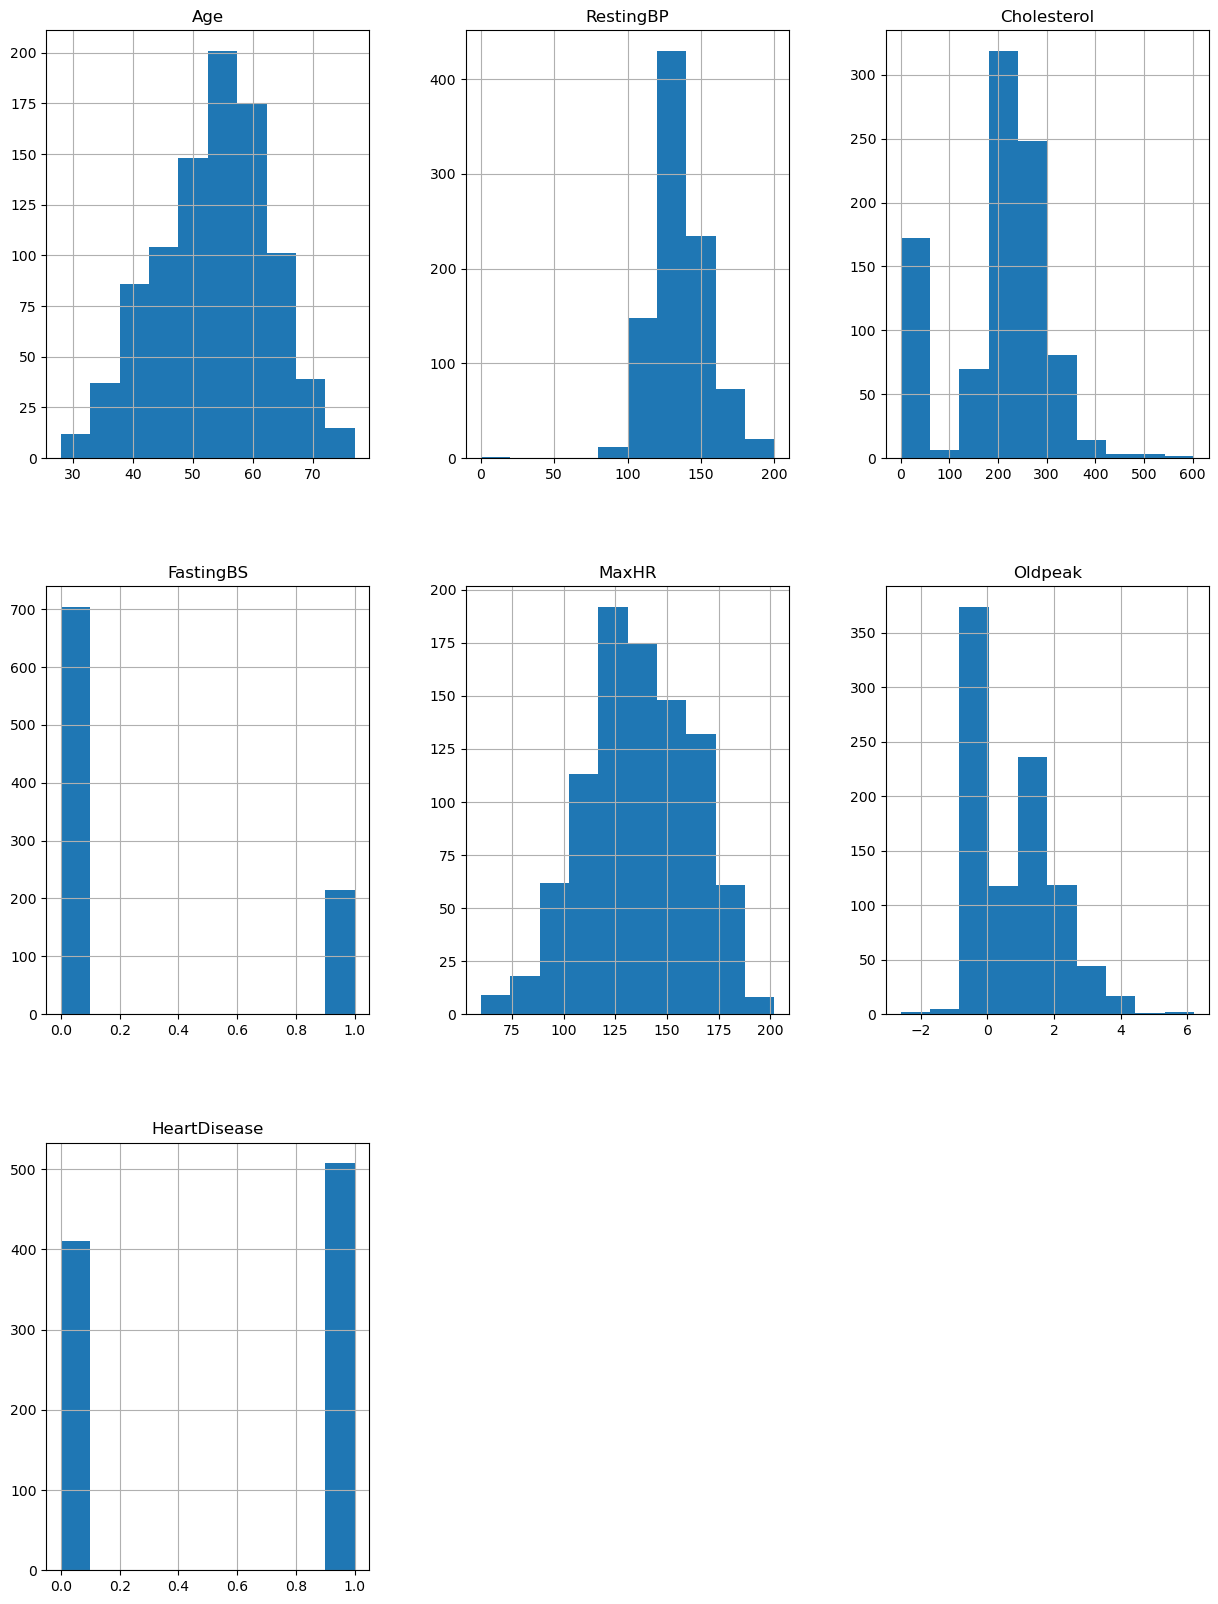

In [4]:
data.hist(figsize=(15, 20));
plt.show()

In [9]:
HeartDisease_true = data.query('HeartDisease != 0')
print('Количество людей с больным сердцем:', HeartDisease_true['HeartDisease'].count())

Количество людей с больным сердцем: 508


In [8]:
HeartDisease_false = data.query('HeartDisease == 0')
print('Количество людей со здоровым сердцем:', HeartDisease_false['HeartDisease'].count())

Количество людей со здоровым сердцем: 410


In [11]:
gender = data['Sex'].value_counts()

<Axes: ylabel='Sex'>

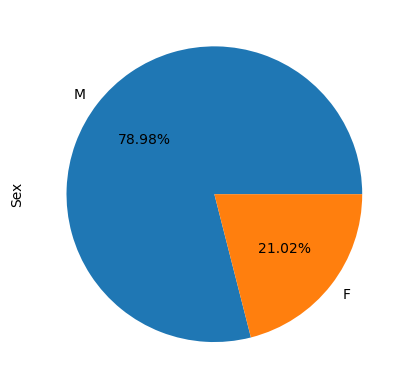

In [14]:
gender.plot(kind='pie',autopct="%0.2f%%")

По диаграмме видно, что болезнями больше страдают люди мужского пола

**Производим группировку значений "Тип боли в груди"**

Необходимо посмотреть какие типы боли встречаются и как часто

In [15]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

_Расшифровка:_

- ASY - Бессимптомная боль (_эпизоды транзиторной кратковременной ишемии сердечной мышцы_)
- NAP - Нетипичная стенокардия(_Характеризуется приступами загрудинных болей, возникающими без видимой связи с факторами, ведущими к повышению потребности миокарда в кислороде_)
- ATA - Атепичная стенокардия
- TA - Тепичная стенокардия 


<Axes: >

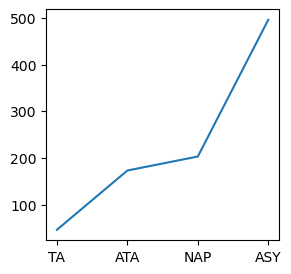

In [17]:
data['ChestPainType'].value_counts(ascending=True).plot(figsize=(3,3))

**Вывод:**
 Файл содержит данные из 918 строк: 

- Из них 508 строк данные людей с больным сердцем - данные будут храниться в переменной `HeartDisease_true`

- Из них 410 строк людей с высоким сердечно-сосудистым риском - данные будут храниться в переменной `HeartDisease_false`

Типы болей:
- Бессимптомная боль: 496 случая это 54% от всех данных
- Нетепичная стенокардия: 203 случая это 22% от всех данных
- Атепичная стенокардия: 173 случая это 19% от всех данных
- Тепичная стенокардия: 46 случаев это 5% от всех данных

Данные подготовлены в хорошем виде, не присутствуют дубли, нет пропущеных значений.

# 1. Исследование данных

Исследование будет проводится в несколько этапов.

1. Этап - Исследование людей с установленой сердечной болезнью
2. Этап - Исследование людей с высоким сердечно-сосудистым риском
3. Этап - Общее иследование - установление связей и влияней

In [18]:
print('Средний возраст людей с больным сердцем:', int(HeartDisease_true['Age'].mean()))

Средний возраст людей с больным сердцем: 55


In [19]:
print('Средний возраст людей с высоким сердечно-сосудистым риском:', int(HeartDisease_false['Age'].mean()))

Средний возраст людей с высоким сердечно-сосудистым риском: 50


### 1. Этап - Исследование людей с установленой сердечной болезнью

Проверяем какие типы болезней встречаются чаще

<Axes: >

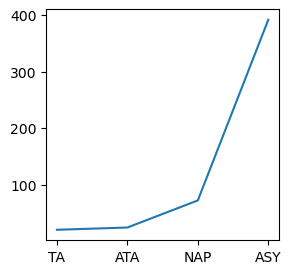

In [20]:
HeartDisease_true.ChestPainType.value_counts(ascending=True).plot(figsize=(3,3))

Произведем категоризацию данных по возросту.

1. Группа - Люди от 20 до 30 включительно
2. Группа - Люди от 31 до 40 включительно
3. Группа - Люди от 41 до 50 включительно
4. Группа - Люди от 51 до 60 включительно
5. Группа - Люди от 61 до 80 включительно

Категоризацию сделаем для всего фрейма разом

In [21]:
def people_group_age(row):
    if row.Age > 20 and row.Age <= 30:
        return 'Группа 1'
    elif row.Age >= 31 and row.Age <= 40:
        return 'Группа 2'
    elif row.Age >= 41 and row.Age <= 50:
        return 'Группа 3'
    elif row.Age >= 51 and row.Age <= 60:
        return 'Группа 4'
    elif row.Age >= 61 and row.Age <= 80:
        return 'Группа 5'

data['people_group_age'] = data.apply(people_group_age, axis=1)
heart_disease_true = data.query('HeartDisease != 0')
heart_disease_false = data.query('HeartDisease == 0')

**1.1 Проверяем какая группа людей встречается чаще**

In [25]:
heart_disease_true.people_group_age.value_counts()

Группа 4    222
Группа 5    161
Группа 3     93
Группа 2     32
Name: people_group_age, dtype: int64

<Axes: >

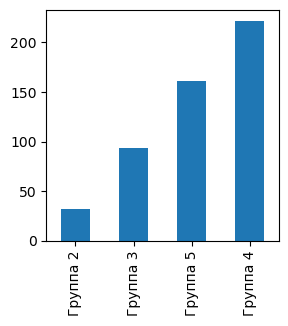

In [26]:
heart_disease_true.people_group_age.value_counts(ascending=True).plot(figsize=(3,3), kind='bar')

Мы произвели деление людей с установленным типом болезни по группам. 

Можно выдвинуть первое предположение:
1. Среди людей с выявленной болезнью сердца возростная группа 4 больше подвержена риску
2. Люди возростной группы 1 или не участвовали в эксперементе, или были выключены из эксперемента

**1.2 Проверяем для какой возрастной группы какой тип болезни встречается чаще**

Построим гравики для каждой возрастной группы

График для: Группа 3


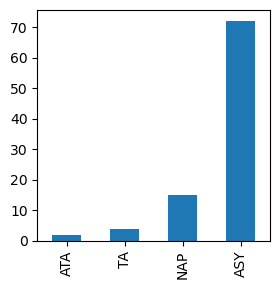

График для: Группа 2


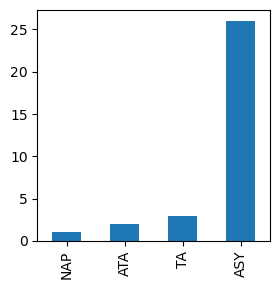

График для: Группа 4


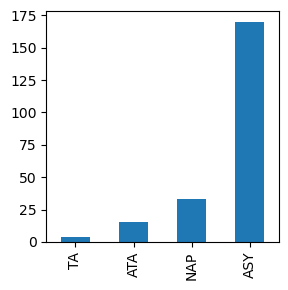

График для: Группа 5


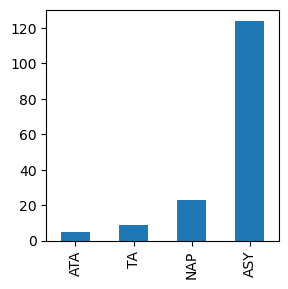

In [27]:
for item in heart_disease_true['people_group_age'].unique():
    print(f'График для: {item}')
    heart_disease_true.query('people_group_age == "{0}"'.format(item))['ChestPainType'].value_counts(ascending=True).plot(figsize=(3,3), kind='bar')
    plt.show()

**Вывод:** 
Для каждой группы ASY - Бессимптомная боль (эпизоды транзиторной кратковременной ишемии сердечной мышцы) - лидирует

**1.3 Проверяем какие парамметры характерны для болезней сердца**

**1.3.1 Бессимптомная боль**

In [87]:
heart_disease_true_asy = heart_disease_true[heart_disease_true['ChestPainType'] == 'ASY']
heart_disease_true.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


**1.3.1.1 Артериальное давление**

Диаграмма размаха артериального давления в состоянии покоя


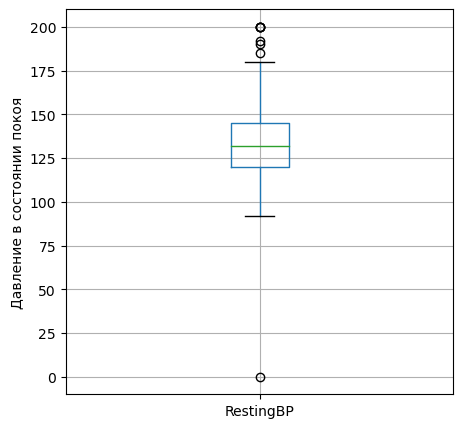

In [89]:
print('Диаграмма размаха артериального давления в состоянии покоя')
heart_disease_true.boxplot(column=['RestingBP'], figsize=(5,5), grid=True)
plt.ylabel('Давление в состоянии покоя')
plt.show()

**Вывод:**
Для ASY "бессимптомная боль" - давление в состоянии покая:
- Минимальное значение - `31`
- Максимальное значение - `180`
- Межквартильный размах находится в районе от `120` до `145`
- Медиана на уровне `130`

Наблюдаем 3 выброса:
- в районе `185` 
- в районе `190`
- в районе `200`


**1.3.1.2 Холестерин**

Диаграмма размаха уровеня холестерина


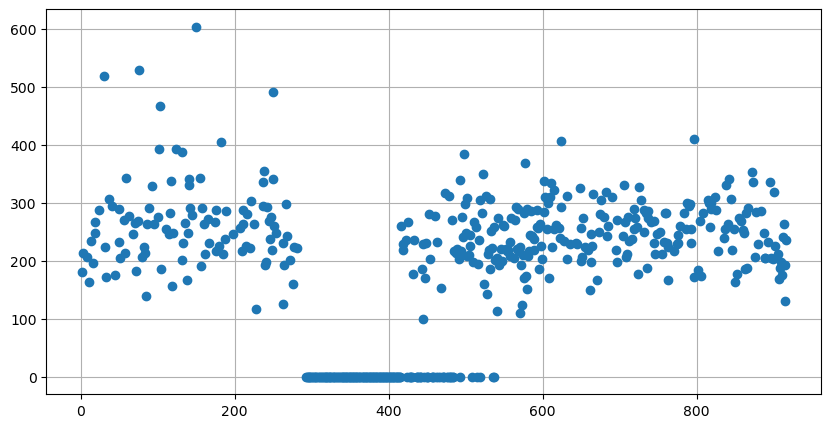

In [90]:
print('Диаграмма размаха уровеня холестерина')
heart_disease_true['Cholesterol'].plot(style='o', figsize=(10,5), grid=True)
#plt.ylabel('Холестерин')
plt.show()

Построим зависимость уровня холестерина и возраста

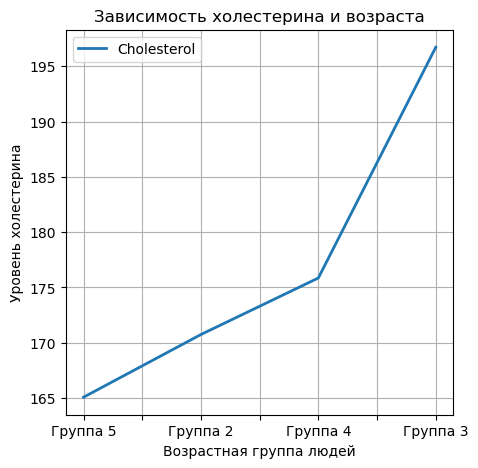

In [91]:
(heart_disease_true
     .pivot_table(index='people_group_age', values='Cholesterol').sort_values(by='Cholesterol', ascending=True)
     .plot(grid=True, figsize=(5, 5),linewidth=2, title='Зависимость холестерина и возраста')
)
plt.xlabel('Возрастная группа людей')
plt.ylabel('Уровень холестерина')
plt.show()

**Вывод:**

- Группа 5 - Холестерин находится в минимальном положении
- Группа 4 и Группа 2 - Холестерин находится в среднем положении и одинаковый
- Группа 3 - Находится в риске больше всех остальных

**1.3.1.3 Глюкоза**

Диаграмма соодержания глюкозы


<Axes: >

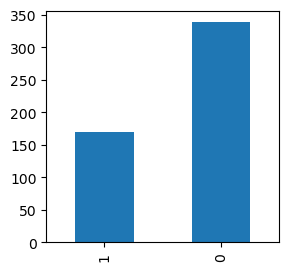

In [92]:
print('Диаграмма соодержания глюкозы')
heart_disease_true.FastingBS.value_counts(ascending=True).plot(figsize=(3,3), kind='bar')

Построим два графика:
1. Люди у кого уровень сахара в крови натощак > 120 мг и их артериальное давление
2. Люди у кого уровень сахара в крови натощак < 120 и их артериальное давление

Диаграмма размаха артериального давления в состоянии покоя для людей у кого уровень сахара в крови натощак > 120 мг


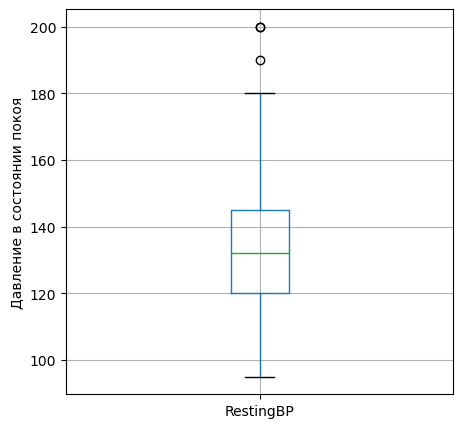

In [95]:
heart_disease_true_fasting_BS_true = heart_disease_true[heart_disease_true['FastingBS'] == 1]
heart_disease_true_fasting_BS_false = heart_disease_true[heart_disease_true['FastingBS'] == 0]
print('Диаграмма размаха артериального давления в состоянии покоя для людей у кого уровень сахара в крови натощак > 120 мг')
heart_disease_true_fasting_BS_true.boxplot(column=['RestingBP'], figsize=(5,5), grid=True)
plt.ylabel('Давление в состоянии покоя')
plt.show()

Диаграмма размаха артериального давления в состоянии покоя для людей у кого уровень сахара в крови натощак < 120 и их артериальное давление


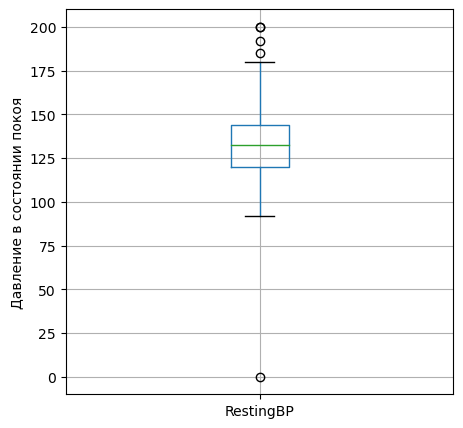

In [96]:
print('Диаграмма размаха артериального давления в состоянии покоя для людей у кого уровень сахара в крови натощак < 120 и их артериальное давление')
heart_disease_true_fasting_BS_false.boxplot(column=['RestingBP'], figsize=(5,5), grid=True)
plt.ylabel('Давление в состоянии покоя')
plt.show()

**Вывод:**

Графики одинаковые. Делаем предположение что уровень глюкозы не влияет на показатель артериального давления

Диаграмма частоты сердечных сокращений


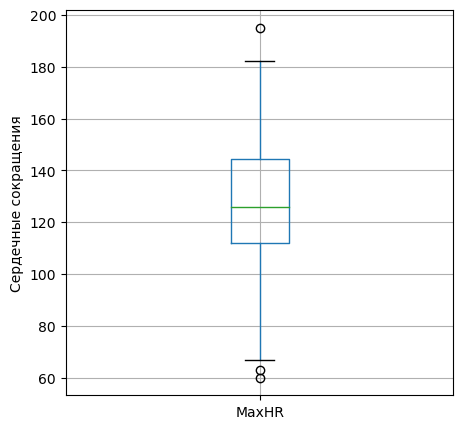

In [97]:
print('Диаграмма частоты сердечных сокращений')
heart_disease_true.boxplot(column=['MaxHR'], figsize=(5,5), grid=True)
plt.ylabel('Сердечные сокращения')
plt.show()

Частота сердечных сокращений:
- Есть два выбивающихся значений

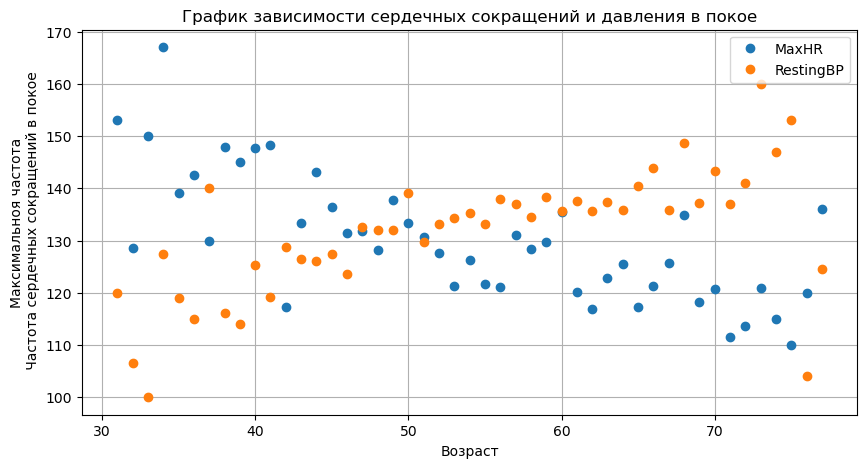

In [98]:
(heart_disease_true
    
     .pivot_table(index='Age', values=['RestingBP', 'MaxHR'])
     .plot(style='o',grid=True, figsize=(10, 5), title='График зависимости сердечных сокращений и давления в покое')
)
plt.xlabel('Возраст')
plt.ylabel('Максимальноя частота\n Частота сердечных сокращений в покое')
plt.show()

**Вывод:**

- Для группы людей в возрасте от 30 до 40 есть пики как максимального значения пульса, так и минимального значения и график выглядит логично. В покое частота сердечных ударов меньше, частоты ударов максимума.

- Для группы людей в возрасте от 40 до 70 значения стремятся к медианному значению `130`. Но аномальное поведение данных мы начинаем замечать на пороге 45 лет, когда частота сердечных колебаний в покое начинает стремиться вверхний диапозон, а максимальная частота колебаний сердца стремится к нижнему значению.

- Для людей в возрасте после 70 зафиксированы анамалии в максимальной частоте (ниже обычного)и в сатсоянии покоя (выше обычного)

**1.3.1.4 Депрессия**

Диаграмма депрессии


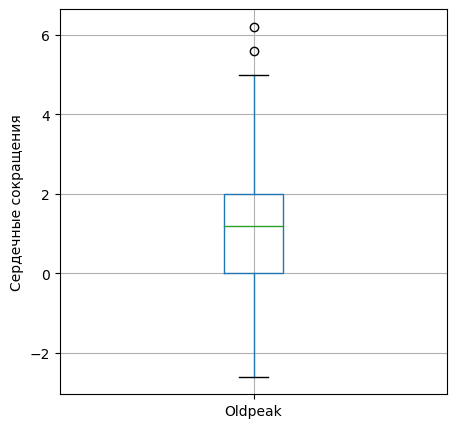

In [99]:
print('Диаграмма депрессии')
heart_disease_true.boxplot(column=['Oldpeak'], figsize=(5,5), grid=True)
plt.ylabel('Сердечные сокращения')
plt.show()

Посмотрим как депрессия влияет на показатели

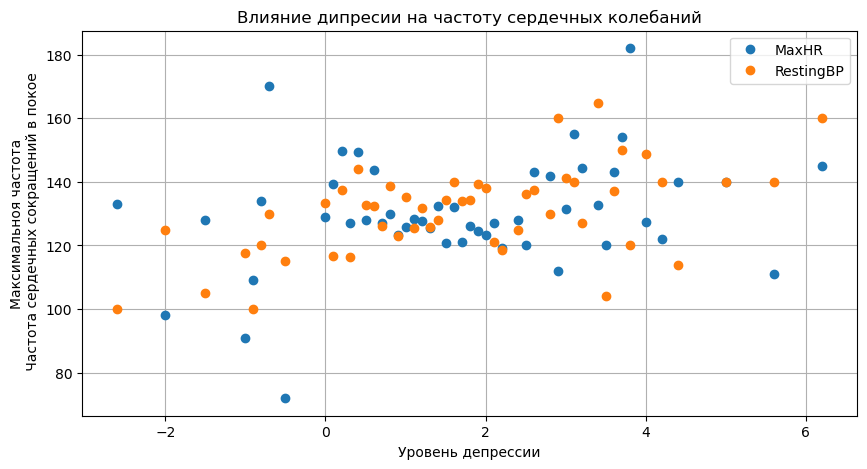

In [100]:
(heart_disease_true
    
     .pivot_table(index='Oldpeak', values=['RestingBP', 'MaxHR'])
     .plot(style='o',grid=True, figsize=(10, 5), title='Влияние дипресии на частоту сердечных колебаний')
)
plt.xlabel('Уровень депрессии')
plt.ylabel('Максимальноя частота\n Частота сердечных сокращений в покое')
plt.show()

**Вывод:**

По графику видно:
1. При отрицательных значениях депрессии:
 - Частота сердечных колебаний в покое находится в периоде от 100 до 130
 - Макс частота сердечных колебаний имеет вариации 
 - Есть и аномальные выбросы маск частоты колебаний <80 и > 160
 
2. При уровне депрессии > 0 частота сердечных колебаний начинает сближение в единую массу и возрастает. 

`Можно предположить, что уровень дипрессии имеет влияние на частоту сердечных колебаний`

**1.3.1.5 Результаты ЭКГ в состоянии покоя**

In [62]:
heart_disease_true['RestingECG'].value_counts()

Normal    224
ST         87
LVH        81
Name: RestingECG, dtype: int64

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == Norma


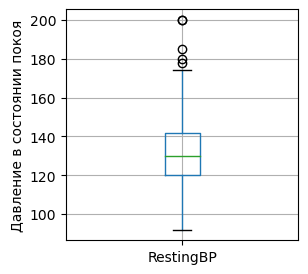

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == ST


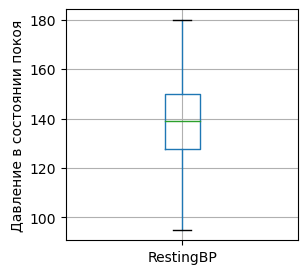

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == LVH


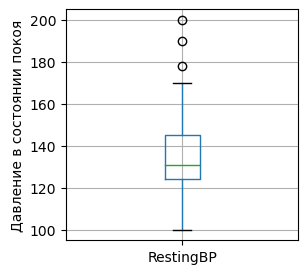

In [68]:
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == Norma')
(heart_disease_true_asy
 .query('RestingECG == "Normal"')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == ST')
(heart_disease_true_asy
 .query('RestingECG == "ST"')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == LVH')
(heart_disease_true_asy
 .query('RestingECG == "LVH"')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()

**1.3.1.6 Стенокардия вызвана физической нагрузкой**

In [102]:
heart_disease_true['ExerciseAngina'].value_counts()

Y    316
N    192
Name: ExerciseAngina, dtype: int64

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == Norma стенокардия == N


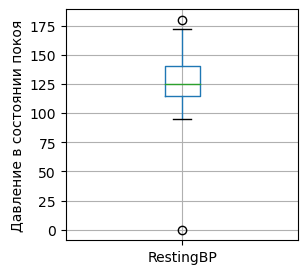

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == ST стенокардия == N


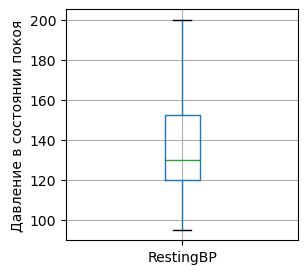

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == LVH стенокардия == N


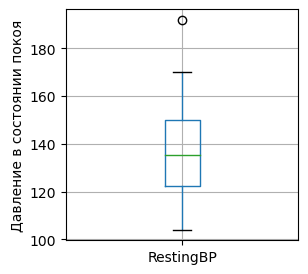

In [103]:
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == Norma стенокардия == N')
(heart_disease_true
 .query('RestingECG == "Normal" & (ExerciseAngina ==  "N")')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == ST стенокардия == N')
(heart_disease_true
 .query('RestingECG == "ST" & (ExerciseAngina ==  "N")')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == LVH стенокардия == N')
(heart_disease_true
 .query('RestingECG == "LVH" & (ExerciseAngina ==  "N")')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == Norma стенокардия == Y


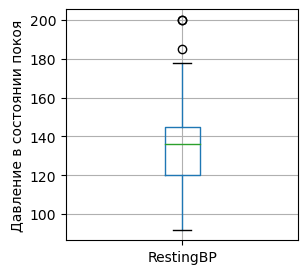

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == ST стенокардия == Y


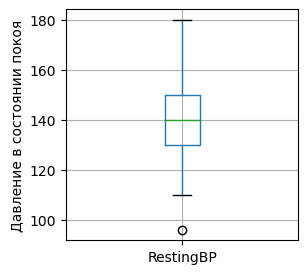

Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == LVH стенокардия == Y


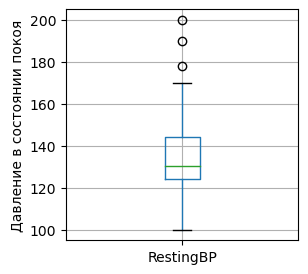

In [75]:
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == Norma стенокардия == Y')
(heart_disease_true_asy
 .query('RestingECG == "Normal" & (ExerciseAngina ==  "Y")')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == ST стенокардия == Y')
(heart_disease_true_asy
 .query('RestingECG == "ST" & (ExerciseAngina ==  "Y")')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()
print('Диаграмма размаха артериального давления в состоянии покоя при ЭКГ == LVH стенокардия == Y')
(heart_disease_true_asy
 .query('RestingECG == "LVH" & (ExerciseAngina ==  "Y")')
 .boxplot(column=['RestingBP'], figsize=(3,3), grid=True)
)
plt.ylabel('Давление в состоянии покоя')
plt.show()

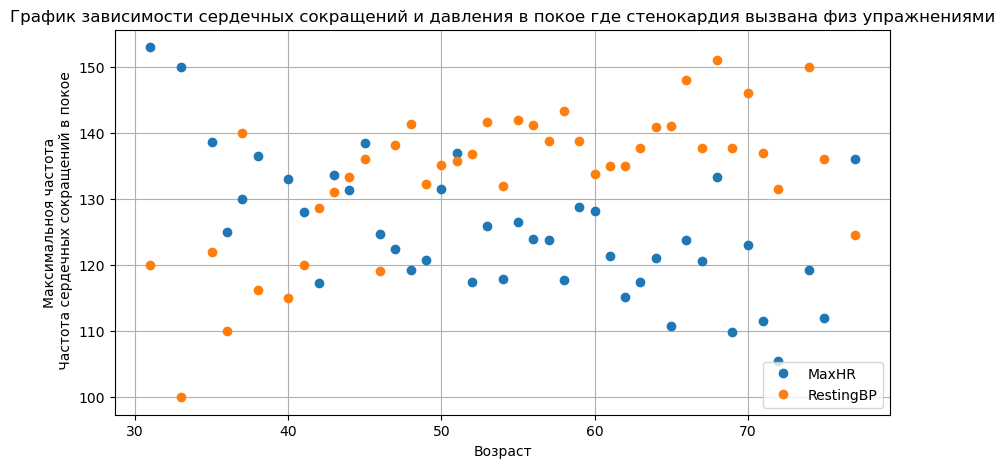

In [104]:
(heart_disease_true
     .query('ExerciseAngina ==  "Y"')
     .pivot_table(index='Age', values=['RestingBP', 'MaxHR'])
     .plot(style='o',grid=True, figsize=(10, 5), title='График зависимости сердечных сокращений и давления в покое где стенокардия вызвана физ упражнениями')
)
plt.xlabel('Возраст')
plt.ylabel('Максимальноя частота\n Частота сердечных сокращений в покое')
plt.show()

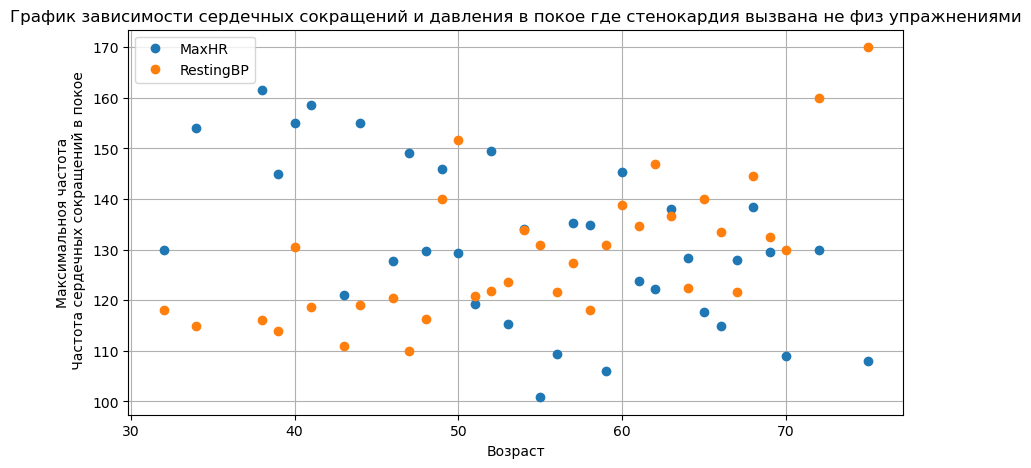

In [82]:
(heart_disease_true_asy
     .query('ExerciseAngina ==  "N"')
     .pivot_table(index='Age', values=['RestingBP', 'MaxHR'])
     .plot(style='o',grid=True, figsize=(10, 5), title='График зависимости сердечных сокращений и давления в покое где стенокардия вызвана не физ упражнениями')
)
plt.xlabel('Возраст')
plt.ylabel('Максимальноя частота\n Частота сердечных сокращений в покое')
plt.show()

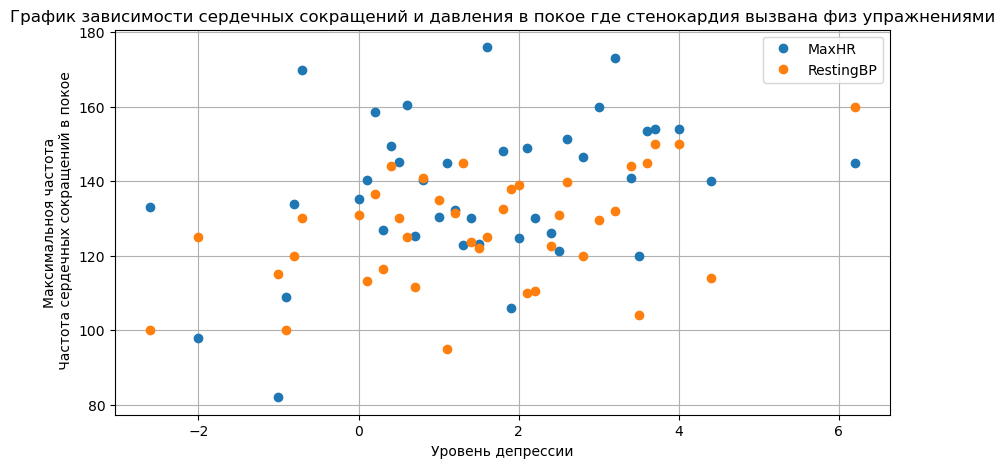

In [105]:
(heart_disease_true
     .query('ExerciseAngina ==  "N"')
     .pivot_table(index='Oldpeak', values=['RestingBP', 'MaxHR'])
     .plot(style='o',grid=True, figsize=(10, 5), title='График зависимости сердечных сокращений и давления в покое где стенокардия вызвана физ упражнениями')
)
plt.xlabel('Уровень депрессии')
plt.ylabel('Максимальноя частота\n Частота сердечных сокращений в покое')
plt.show()